In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
data_pd = pd.read_csv(r"C:\Users\yagiz\Desktop\data\mnist\mnist_train.csv")

In [97]:
label = data_pd["label"]
label

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [98]:
data = np.array(data_pd)
data


m, n = data.shape
len(data)

60000

In [99]:
label_np = data[:, 0]
(label_np)

str(label_np[0])

'5'

In [100]:
train = data[:, 1:]

train = train / 255.


def img_viewer(i):
    img = train[i].reshape((28, 28))
    plt.imshow(img, cmap="gray")
    plt.title(str(label_np[i]), color = "red")

    plt.show()


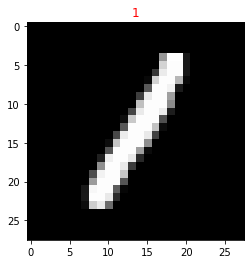

In [101]:
img_viewer(783)

In [119]:
def init_params():

    w1 = np.random.rand(20, 784) -0.5 
    b1 = np.random.rand(20, 1) -0.5
    w2 = np.random.rand(10, 20) -0.5
    b2 = np.random.rand(10, 1) -0.5

    return w1, b1, w2, b2

def relu(z):

    return np.maximum(z, 0) # returns z if z > 0 else 0

def drelu(z):

    return z > 0


def one_hot(y):

    a = np.zeros((y.size, y.max() + 1))
    a[np.arange(y.size), y] = 1
    return a.T

def softmax(z):

    return np.exp(z) / sum(np.exp(z))


def forward(w1, b1, w2, b2, x):

    z1 = w1.dot(x.T) + b1
    a1 = relu(z1)

    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)

    return z1, a1, z2, a2

def backward(z1, a1, z2, a2, w1, w2, x, y):
    
    one_hot_y = one_hot(label_np)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * drelu(z1)
    dw1 = 1 / m * dz1.dot(x)
    db1 = 1 / m * np.sum(dz1)

    return dw1, db1, dw2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2



In [120]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [121]:
W1, b1, W2, b2 = gradient_descent(train, label_np, 0.10, 500)

Iteration:  0
[2 2 5 ... 3 2 2] [5 0 4 ... 5 6 8]
0.0879
Iteration:  10
[6 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
0.24976666666666666
Iteration:  20
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
0.36541666666666667
Iteration:  30
[3 0 4 ... 3 6 6] [5 0 4 ... 5 6 8]
0.44913333333333333
Iteration:  40
[8 0 4 ... 3 6 6] [5 0 4 ... 5 6 8]
0.51705
Iteration:  50
[8 0 4 ... 3 6 1] [5 0 4 ... 5 6 8]
0.5759833333333333
Iteration:  60
[3 0 4 ... 3 6 1] [5 0 4 ... 5 6 8]
0.6205833333333334
Iteration:  70
[3 0 4 ... 3 6 1] [5 0 4 ... 5 6 8]
0.6512333333333333
Iteration:  80
[3 0 4 ... 3 6 1] [5 0 4 ... 5 6 8]
0.674
Iteration:  90
[3 0 4 ... 3 6 1] [5 0 4 ... 5 6 8]
0.6926333333333333
Iteration:  100
[3 0 4 ... 3 6 1] [5 0 4 ... 5 6 8]
0.7088833333333333


KeyboardInterrupt: 